Methods of Machine Learning and Intellectual Analysis of Data (Learning course) \
Bohdan Pavlyshenko (https://www.linkedin.com/in/bpavlyshenko/)

# EDA (Rossmann Store Sales)

Used resource:\
https://www.kaggle.com/c/rossmann-store-sales

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV,Lasso, LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
train_df=pd.read_csv('data/rossm_train_df.csv')
test_df=pd.read_csv('data/rossm_test_df.csv')

In [ ]:
numerical_features = ['Promo','SchoolHoliday']
categorical_features = ['Store','StateHoliday','StoreType', 'Assortment','weekday', 'monthday', 'month']
target = 'logSales'

In [402]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_enc=enc.fit_transform(train_df[categorical_features])
test_enc=enc.transform(test_df[categorical_features])

In [403]:
train_enc[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [404]:
categorical_feat_enc=enc.get_feature_names_out(categorical_features)
categorical_feat_enc

array(['Store_1007', 'Store_1017', 'Store_102', 'Store_1022',
       'Store_1044', 'Store_1047', 'Store_1052', 'Store_1070',
       'Store_1079', 'Store_1083', 'Store_1095', 'Store_1097',
       'Store_111', 'Store_118', 'Store_131', 'Store_141', 'Store_146',
       'Store_160', 'Store_173', 'Store_175', 'Store_177', 'Store_182',
       'Store_199', 'Store_222', 'Store_238', 'Store_259', 'Store_270',
       'Store_28', 'Store_320', 'Store_321', 'Store_324', 'Store_326',
       'Store_327', 'Store_333', 'Store_344', 'Store_350', 'Store_359',
       'Store_364', 'Store_367', 'Store_378', 'Store_421', 'Store_44',
       'Store_448', 'Store_452', 'Store_458', 'Store_47', 'Store_474',
       'Store_480', 'Store_515', 'Store_521', 'Store_554', 'Store_568',
       'Store_583', 'Store_589', 'Store_607', 'Store_614', 'Store_62',
       'Store_625', 'Store_626', 'Store_627', 'Store_645', 'Store_65',
       'Store_676', 'Store_681', 'Store_689', 'Store_695', 'Store_7',
       'Store_73', 'Store_7

In [405]:
train_enc_df=pd.DataFrame(train_enc,columns=categorical_feat_enc)
test_enc_df=pd.DataFrame(test_enc,columns=categorical_feat_enc)

In [406]:
train_enc_df.head()

,Store_1007,Store_1017,Store_102,Store_1022,Store_1044,Store_1047,Store_1052,Store_1070,Store_1079,Store_1083,Store_1095,Store_1097,Store_111,Store_118,Store_131,Store_141,Store_146,Store_160,Store_173,Store_175,Store_177,Store_182,Store_199,Store_222,Store_238,Store_259,Store_270,Store_28,Store_320,Store_321,Store_324,Store_326,Store_327,Store_333,Store_344,Store_350,Store_359,Store_364,Store_367,Store_378,Store_421,Store_44,Store_448,Store_452,Store_458,Store_47,Store_474,Store_480,Store_515,Store_521,Store_554,Store_568,Store_583,Store_589,Store_607,Store_614,Store_62,Store_625,Store_626,Store_627,Store_645,Store_65,Store_676,Store_681,Store_689,Store_695,Store_7,Store_73,Store_732,Store_754,Store_756,Store_758,Store_760,Store_762,Store_765,Store_77,Store_78,Store_784,Store_789,Store_794,Store_798,Store_80,Store_822,Store_826,Store_829,Store_833,Store_834,Store_854,Store_862,Store_887,Store_922,Store_925,Store_93,Store_962,Store_965,Store_967,Store_97,Store_972,Store_976,Store_991,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,monthday_1,monthday_10,monthday_11,monthday_12,monthday_13,monthday_14,monthday_15,monthday_16,monthday_17,monthday_18,monthday_19,monthday_2,monthday_20,monthday_21,monthday_22,monthday_23,monthday_24,monthday_25,monthday_26,monthday_27,monthday_28,monthday_29,monthday_3,monthday_30,monthday_31,monthday_4,monthday_5,monthday_6,monthday_7,monthday_8,monthday_9,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [407]:
X_train_df=pd.concat([train_df[numerical_features], train_enc_df], axis=1)
X_test_df=pd.concat([test_df[numerical_features], test_enc_df], axis=1, ignore_index=True)

In [456]:
features=numerical_features+list(categorical_feat_enc)

In [408]:
train_df.shape, train_enc_df.shape, X_train_df.shape

((73000, 18), (73000, 161), (73000, 163))

In [409]:
X_train = X_train_df.values
X_test = X_test_df.values
y_train = train_df[target]
y_test = test_df[target]

In [410]:
X_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [468]:
regr=RandomForestRegressor(n_estimators=100)

_=regr.fit(X_train,y_train)

train_df['pred_rf']=regr.predict(X_train)
test_df['pred_rf']=regr.predict(X_test)

train_rmse_rf=np.round(mean_squared_error(train_df[target], train_df['pred_rf'], squared=False),3)
test_rmse_rf=np.round(mean_squared_error(test_df[target], test_df['pred_rf'], squared=False),3)
train_rmse_rf, test_rmse_rf

(0.218, 0.506)

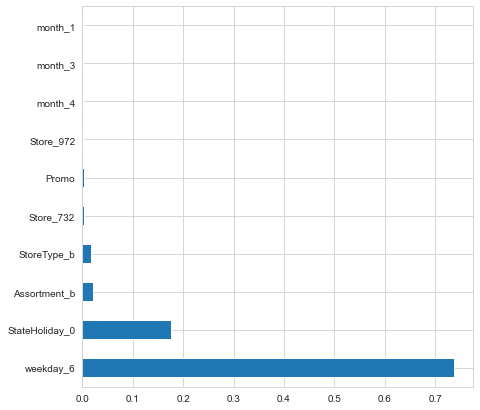

In [470]:
importances = regr.feature_importances_
df_importances=pd.Series(importances,index=features)
df_importances.sort_values(ascending=False, inplace=True)
df_importances[:10].plot(kind='barh',figsize=(7,7))
plt.show()

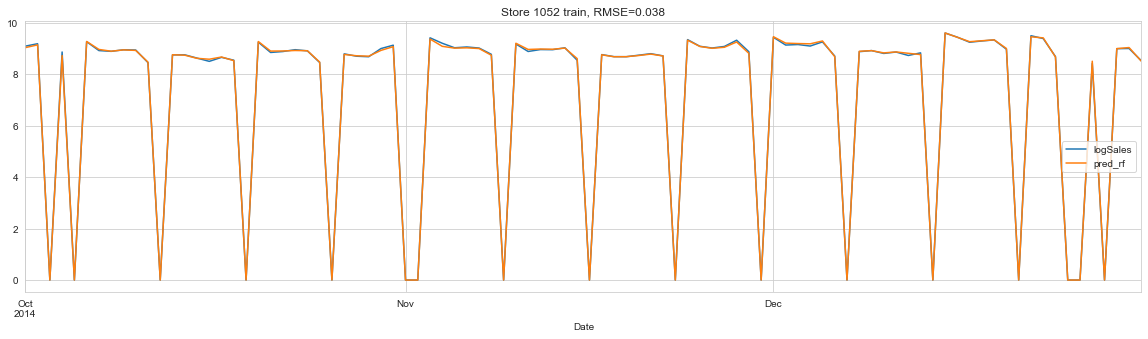

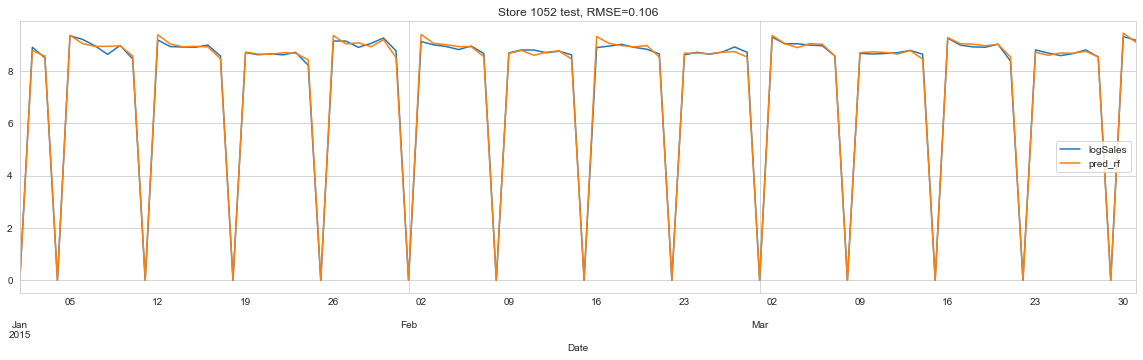

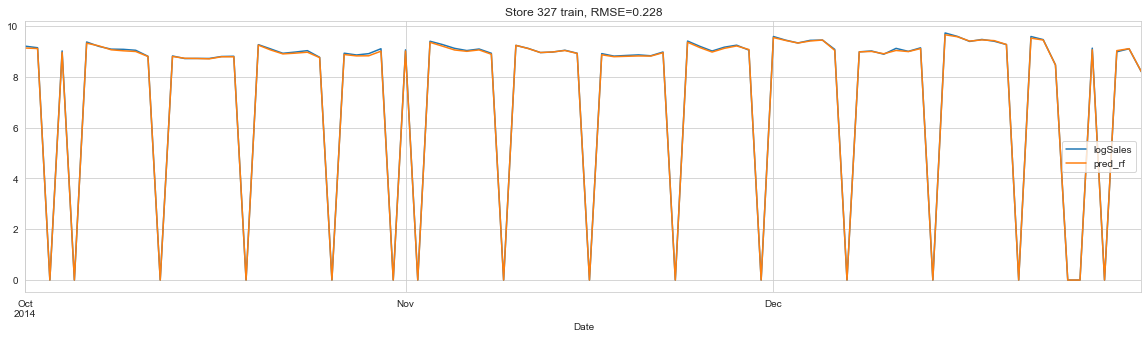

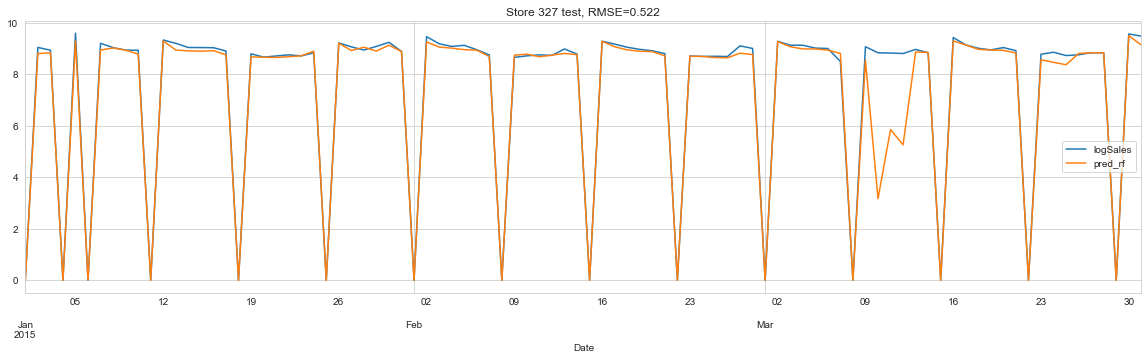

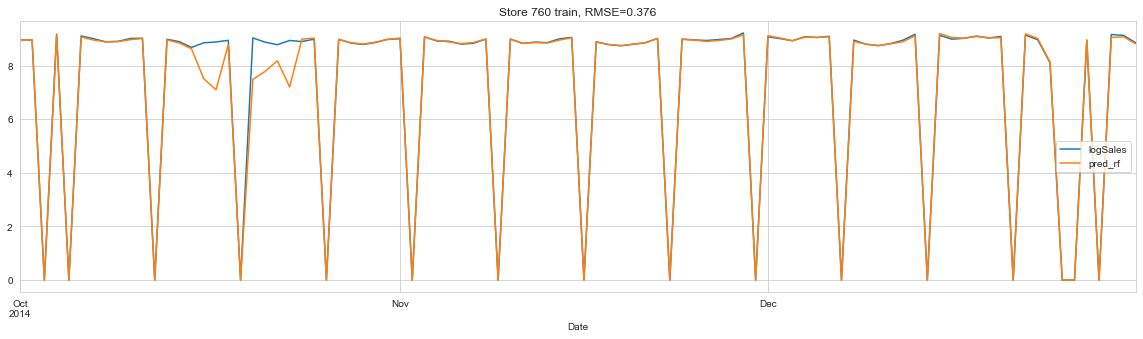

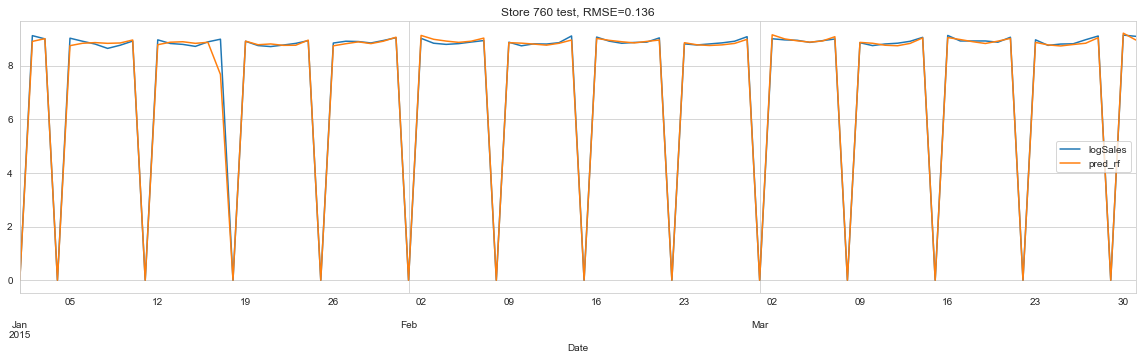

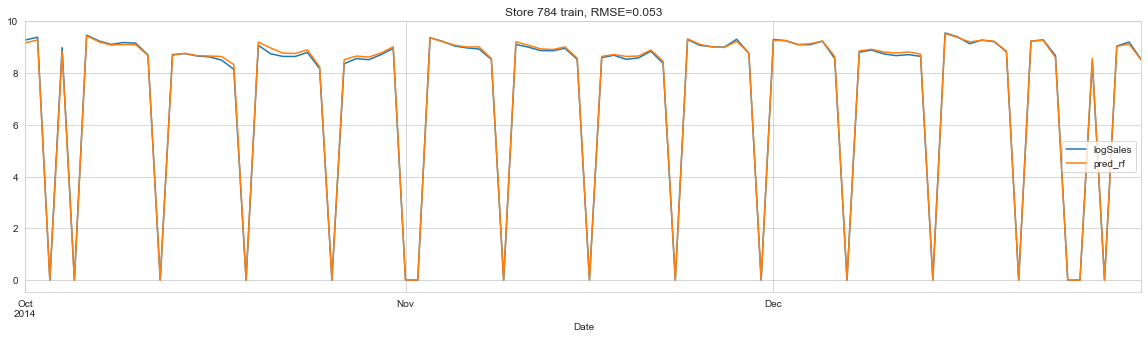

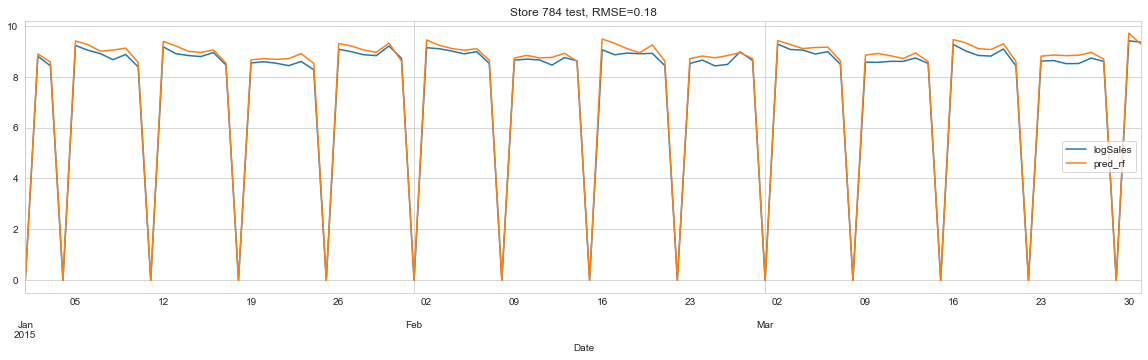

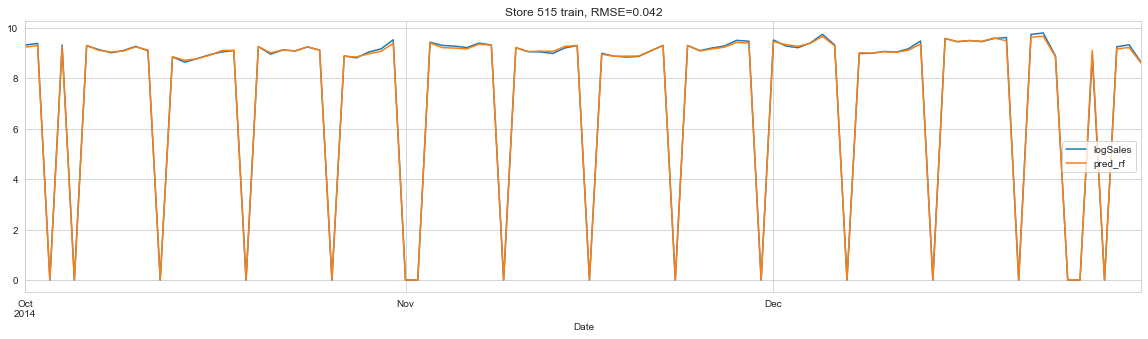

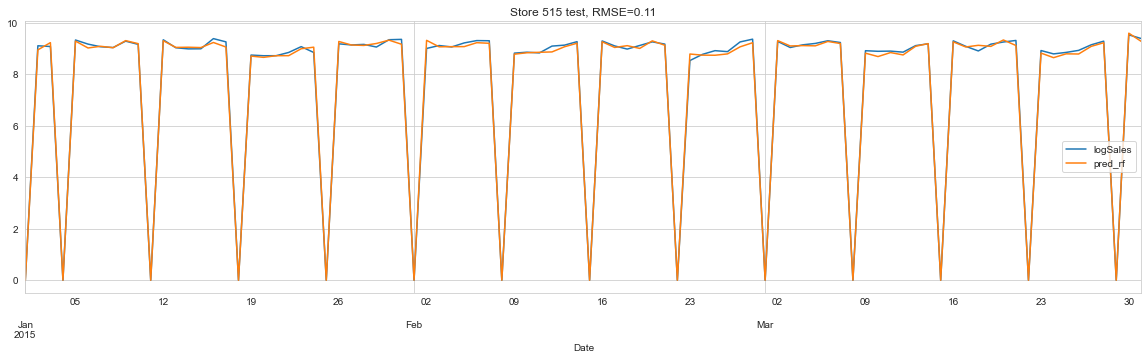

In [424]:
stores=rand_stores[:5]
for i in stores:
    i=str(i)
    train_rmse=np.round(mean_squared_error(train_df[train_df.Store==i][target], \
                                  train_df[train_df.Store==i]['pred_rf'], squared=False),3)
    test_rmse=np.round(mean_squared_error(test_df[test_df.Store==i][target], \
                                 test_df[test_df.Store==i]['pred_rf'], squared=False),3)
    train_df[train_df.Store==i].set_index('Date')['2014-10':][[target,'pred_rf']]\
    .plot(title=f'Store {i} train, RMSE={train_rmse}',figsize=(20,5))
    plt.show()
    test_df[test_df.Store==i].set_index('Date')[:'2015-03'][[target,'pred_rf']]\
    .plot(title=f'Store {i} test, RMSE={test_rmse}', figsize=(20,5))
    plt.show()

In [442]:
regr=LinearRegression()
_=regr.fit(X_train,y_train)
train_df['pred_lr']=regr.predict(X_train)
test_df['pred_lr']=regr.predict(X_test)
train_rmse_lr=np.round(mean_squared_error(train_df[target], train_df['pred_lr'], squared=False),3)
test_rmse_lr=np.round(mean_squared_error(test_df[target], test_df['pred_lr'], squared=False),3)

In [434]:
print(f'Random Forest - RMSE train: {train_rmse_rf}, RMSE test: {test_rmse_rf}')
print(f'Linear Regression - RMSE train: {train_rmse_lr}, RMSE test: {test_rmse_lr}')

Random Forest - RMSE train: 0.219, RMSE test: 0.505
Linear Regression - RMSE train: 0.86, RMSE test: 0.726


In [450]:
regr=Lasso(alpha=0.015)
scaler = StandardScaler()
X_train_st=scaler.fit_transform(X_train)
X_test_st=scaler.transform(X_test)
_=regr.fit(X_train_st,y_train)
train_df['pred_lasso']=regr.predict(X_train_st)
test_df['pred_lasso']=regr.predict(X_test_st)
train_rmse_lasso=np.round(mean_squared_error(train_df[target], train_df['pred_lasso'], squared=False),3)
test_rmse_lasso=np.round(mean_squared_error(test_df[target], test_df['pred_lasso'], squared=False),3)
print(f'LASSO Regression - RMSE train: {train_rmse_lasso}, RMSE test: {test_rmse_lasso}')

LASSO Regression - RMSE train: 0.871, RMSE test: 0.732


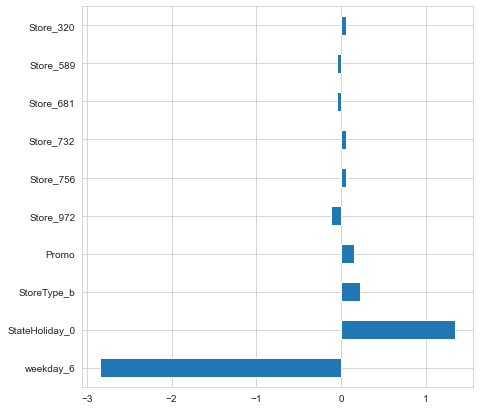

In [467]:
lasso_coef=pd.DataFrame({'coef':regr.coef_},index=features)
lasso_coef['coef_abs']=np.abs(lasso_coef['coef'])
lasso_coef.sort_values('coef_abs',ascending=False, inplace=True)
lasso_coef=lasso_coef[lasso_coef.coef!=0]
_=lasso_coef.iloc[:10].coef.plot(kind='barh',figsize=(7,7))